<h1>В какой валюте выгоднее получать ЗП?<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Проблематика-задачи" data-toc-modified-id="Проблематика-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Проблематика задачи</a></span></li><li><span><a href="#Решение-кейса" data-toc-modified-id="Решение-кейса-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Решение кейса</a></span><ul class="toc-item"><li><span><a href="#Оценка-волатильности-курсов-валют" data-toc-modified-id="Оценка-волатильности-курсов-валют-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Оценка волатильности курсов валют</a></span></li><li><span><a href="#Дисконтирование-заработной-платы-сотрудников-Европейской-и-Российской-компаний" data-toc-modified-id="Дисконтирование-заработной-платы-сотрудников-Европейской-и-Российской-компаний-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дисконтирование заработной платы сотрудников Европейской и Российской компаний</a></span></li></ul></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоги исследования</a></span></li></ul></div>

## Постановка задачи

**Оценить, в какой валюте выгоднее получать заработную плату - евро или рубли, в привязке к месту работы (Европа/Россия), поскольку необходимо учитывать годовую инфляции страны, в которой проживает сотрудник компании.**

*Исходные данные:*
- [x] динамика курса валютных пар помесячно с июля 2010 г. по июль 2022 г. (доллар к рублю `usd_rub.csv`, евро к доллару `eur_usd.csv`)
- [x] годовая инфляция в Европе принимается на уровне 9%
- [x] годовая инфляция в России принимается на уровне 20%


## Проблематика задачи

При решении задачи необходимо брать в расчет несколько факторов:

1) На комфортность и стабильность жизни в стране влияет уровень развития ее экономики, ее технологическое развитие, а именно является ли страна производителем технологичных товаров: электроники, компьютерной, бытовой и промышленной техники. Если страна не производит таких товаров, то закупка товаров производится в соответствии с курсом валют и определяет стоимость продукта для конечного потребления. Поэтому волатильность валютной пары напрямую влиет на покупательскую способность жителей страны-импортера. Резкий рост курса валюты отрицательно влияет на покупательскую способность граждан страны, которая только импортирует товары и сама не производит подобных. При решении задачи произведем оценку данного фактора.

2) Вторым фактором, влияющим на покупательскую способность граждан, является инфляция. Инфляция – рост цен на товары и услуги. Умеренная инфляция – положительный для экономики фактор, она стимулирует спрос, способствует расширению производства и инвестированию. В то время как гиперинфляция – спутница кризисов и войн, - отрицательно влияет на благосостояние граждан страны. Рост цен превышает 50% и может достигать астрономических значений. Поэтому оценку выгодности получения заработной платы в иностранной валюте или в валюте государтсва необходимо проводить с учетом данного фактора. При оценке влияния инфляции на обесцение заработной платы можно провести ее дисконтирование, чтобы узнать покупательскую способность в прошлом при текущем темпе инфляции. В нашем случае поступим немного по-другому, будем приводить заработную плату сотрудника, которую он получал 12 лет назад, к текущим условиям, без учета ее ежегодной индексации для наглядности. 

## Решение кейса

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")

import numpy as np

from scipy import stats as st

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

from datetime import datetime

Загружаю данные о котировках валют 

Источники:\
https://ru.investing.com/currencies/eur-usd-historical-data \
https://ru.investing.com/currencies/usd-rub-historical-data


In [2]:
try:
    eur_usd_ratio, usd_rub_ratio = (
    pd.read_csv('datasets/eur_usd.csv',decimal=','),
    pd.read_csv('datasets/usd_rub.csv',decimal=','),
)
except:
    eur_usd_ratio, usd_rub_ratio = (
    pd.read_csv('eur_usd.csv',decimal=','),
    pd.read_csv('usd_rub.csv',decimal=','),
)

In [3]:
# исходный датафрейм eur_usd_ratio
eur_usd_ratio.head()

,Дата,Цена,Откр.,Макс.,Мин.,Изм. %
0,Июль '22,1.0210,1.0478,1.0478,0.9952,"-2,59%"
1,Июнь '22,1.0482,1.0734,1.0775,1.0359,"-2,34%"
2,Май '22,1.0733,1.0550,1.0788,1.0350,"1,82%"
3,Апр. '22,1.0541,1.1065,1.1077,1.0471,"-4,74%"
4,Март '22,1.1065,1.1218,1.1234,1.0805,"-1,37%"


In [4]:
# исходный датафрейм usd_rub_ratio
usd_rub_ratio.head()

,Дата,Цена,Откр.,Макс.,Мин.,Изм. %
0,Июль '22,57.29,51.4500,64.5988,51.3998,"11,35%"
1,Июнь '22,51.45,61.5000,62.4923,50.1006,"-16,34%"
2,Май '22,61.50,70.9600,70.9600,55.8383,"-13,33%"
3,Апр. '22,70.96,83.2000,84.9917,70.3221,"-14,71%"
4,Март '22,83.20,94.6025,121.2100,82.9525,"-12,05%"


Данные не удобны для анализа, приведу их к "читабельному виду"

Преобразую датафрейм для рабочего вида:

In [5]:
# функция преобразования данных
def change_df(df):
    month_dict = {
        'Дек.' : '12',
        'Нояб.' : '11',
        'Окт.' : '10', 
        'Сент.' : '09', 
        'Авг.' : '08',
        'Июль' : '07',
        'Июнь' : '06',
        'Май' : '05',
        'Апр.' : '04',
        'Март' : '03',
        'Февр.' : '02',
        'Янв.' : '01', 
    }
    #дропаю лишнюю информацию
    df = df.drop(columns=['Откр.','Макс.','Мин.','Изм. %'])
    # переназываю колонки
    df.columns = ['date','price'] 
    
    # сплитую дату и беру месяц
    df['month_object'] =  df['date'].apply(lambda x: x.split(" '")[0])
    # по словарю беру соответствующий номер месяца
    df['month'] = df['month_object'].apply(lambda x: month_dict.get(x))
    
    # сплитую и беру год
    df['year'] =  df['date'].apply(lambda x: '20'+x.split(" '")[1])
    # собираю дату в формате datetime
    df['dt'] = (df['year']+'-'+df['month']+'-'+'01').astype('datetime64') 
    
     # дропаю ненужные колонки
    df = df.drop(columns=['date','month_object','month','year'])
    
    return df

Получаю рабочие датафреймы

Датафрейм валютных пар EUR/USD:

In [6]:
eur_usd_ratio = change_df(eur_usd_ratio)
eur_usd_ratio.head()

,price,dt
0,1.0210,2022-07-01
1,1.0482,2022-06-01
2,1.0733,2022-05-01
3,1.0541,2022-04-01
4,1.1065,2022-03-01


Датафрейм валютных пар USD/RUB:

In [7]:
usd_rub_ratio = change_df(usd_rub_ratio)
usd_rub_ratio.head()

,price,dt
0,57.29,2022-07-01
1,51.45,2022-06-01
2,61.50,2022-05-01
3,70.96,2022-04-01
4,83.20,2022-03-01


Визуализирую динамику курсов для наглядности:

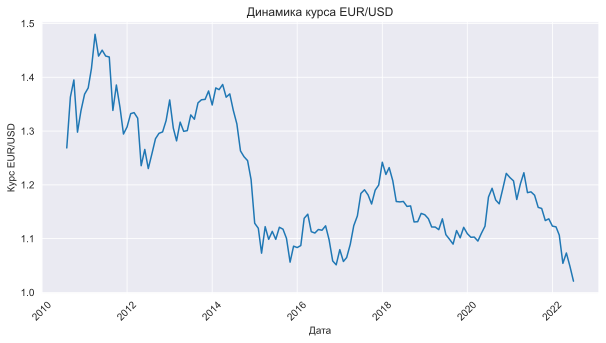

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(x=eur_usd_ratio['dt'],y=eur_usd_ratio['price'])
plt.title('Динамика курса EUR/USD')
plt.ylabel('Курс EUR/USD')
plt.xlabel('Дата')
plt.xticks(fontsize=10,rotation=45)
plt.show()

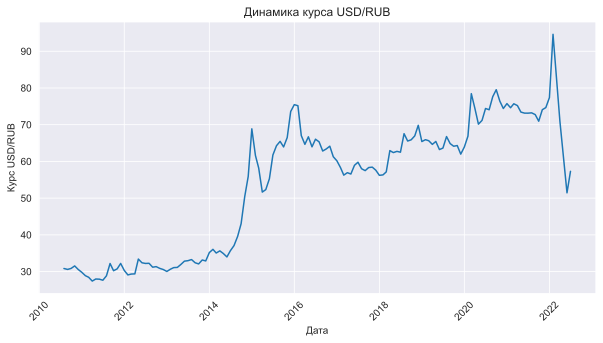

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(x=usd_rub_ratio['dt'],y=usd_rub_ratio['price'])
plt.title('Динамика курса USD/RUB')
plt.ylabel('Курс USD/RUB')
plt.xlabel('Дата')
plt.xticks(fontsize=10,rotation=45)
plt.show()

Изменчивость курсов видно наглядно, но нужно оценить их волатильность.

### Оценка волатильности курсов валют

Теперь посмотрим на волатильность курсов (метод подсмотрел в https://habr.com/ru/post/494636/):

Задаю окно расчета волатильности валютны в 3 месяца:

In [10]:
min_periods = 3
#считаю волатильность курсов
usd_rub_ratio['vol'] = usd_rub_ratio['price'].rolling(min_periods).std() 
eur_usd_ratio['vol'] = eur_usd_ratio['price'].rolling(min_periods).std() 

Теперь посмотрим визуально на данные:

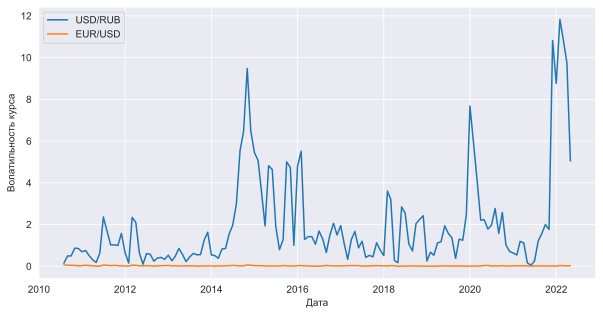

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(x=usd_rub_ratio['dt'],y=usd_rub_ratio['vol'],label='USD/RUB')
sns.lineplot(x=eur_usd_ratio['dt'],y=eur_usd_ratio['vol'],label='EUR/USD')
plt.legend()
plt.ylabel('Волатильность курса')
plt.xlabel('Дата')
plt.show()

Видим вполне ожидаемый результат. Волатильность рубля очень большая по сравнению с почти нулевой волатильностью евро. На эту проблему есть ответ - ряд внешнеполитических и экономических факторов.

### Дисконтирование заработной платы сотрудников Европейской и Российской компаний

Рассмотрим как влияет инфляция на зарплату IT - специалистов, устроившихся в России и в Европе. Для простоты и наглядности будем считать, что заработная плата сотрудников одинакова (в пересчете на доллар), что, естественно, маловероятно. Примем заработную плату в размере 3000$, как исходную заработную плату IT специалистов. Но выплачиваться она будет в местной валюте и не будет привязана к доллару напрямую.

In [12]:
# исходная заработная плата в июле 2010 г.
wages_usd = 3000

Исходная зарплата IT-специалиста в России июле 2010 года в рублях:

In [13]:
wages_rub = wages_usd * usd_rub_ratio['price'][len(usd_rub_ratio['price'])-1]
wages_rub

92490.0

Исходная зарплата IT-специалиста в Европе июле 2010 года в Евро.

In [14]:
wages_eur = round(wages_usd / eur_usd_ratio['price'][len(eur_usd_ratio['price'])-1])
wages_eur

2365

Годовая инфляция в Еропе и России по условию

In [15]:
inflation_europe = 0.09
inflation_russia = 0.2

Для удобства дисконтирования помесячно посчитаю месячную инфляцию в Европе и России:

In [16]:
inf_month_europe = (1 + inflation_europe) ** (1 / 12) - 1
inf_month_russia = (1 + inflation_russia) ** (1 / 12) - 1

Теперь расчитаем реальную ежемесячную зарплату с учетом инфляции, не учитывая ее ежегодную индексацию.

In [17]:
# функция расчета заработной платы, приведенной на текущие условия
# буду передавать три аргумента:
# * исходный датафрейм
# * исходную ЗП в валюте государства
# * месячную инфляцию в стране

def salary_calculator(df,wages,inflation_month):
    
    # массив, куда буду добавлять ЗП, в пересчете на будущие месяцы с учетом ее обесценения 
    wages_with_inf = [wages]
    wages_change = wages
    
    # пройдусь циклом по всем месяцам и буду добавлять новую ЗП в список
    for i in range(len(df.index)-1):
        wages_change = wages_change * (1 - inflation_month)
        wages_with_inf.append(wages_change)
        
    # транформирую список в Series для добавления в исходный датафрейм
    wages_with_inf = pd.Series(wages_with_inf,index=np.arange(len(df.index)-1,-1,-1))
    
    # столбец с обесцениванием заработной платы из-за инфляции
    df['real_salary'] = wages_with_inf
    
    return df

Получаю обновленные датафреймы с данным об обесценении заработной платы

Для сотрудника в России, получающего ЗП в рублях:

In [18]:
usd_rub_ratio = salary_calculator(usd_rub_ratio,wages_rub,inf_month_russia)
usd_rub_ratio.head()

,price,dt,vol,real_salary
0,57.29,2022-07-01,NaN,10184.989919
1,51.45,2022-06-01,NaN,10343.340993
2,61.50,2022-05-01,5.046983,10504.154029
3,70.96,2022-04-01,9.756487,10667.467305
4,83.20,2022-03-01,10.879638,10833.319693


Для сотрудника, живущего в Европе и с ЗП в Евро:

In [19]:
eur_usd_ratio = salary_calculator(eur_usd_ratio,wages_eur,inf_month_europe)
eur_usd_ratio.head()

,price,dt,vol,real_salary
0,1.0210,2022-07-01,NaN,840.632025
1,1.0482,2022-06-01,NaN,846.734716
2,1.0733,2022-05-01,0.026157,852.881710
3,1.0541,2022-04-01,0.013124,859.073330
4,1.1065,2022-03-01,0.026510,865.309898


Для объективной оценки с учетом волатильности курса пересчитаю заработную плату сотрудников к единой валюте - USD:

Для сотрудника из России:

In [20]:
usd_rub_ratio['salary_usd_russia'] = round(usd_rub_ratio['real_salary'] / usd_rub_ratio['price'])
usd_rub_ratio.head()

,price,dt,vol,real_salary,salary_usd_russia
0,57.29,2022-07-01,NaN,10184.989919,178.0
1,51.45,2022-06-01,NaN,10343.340993,201.0
2,61.50,2022-05-01,5.046983,10504.154029,171.0
3,70.96,2022-04-01,9.756487,10667.467305,150.0
4,83.20,2022-03-01,10.879638,10833.319693,130.0


Для сотрудника из Европы:

In [21]:
eur_usd_ratio['salary_usd_europe'] = round(eur_usd_ratio['real_salary'] * eur_usd_ratio['price'])
eur_usd_ratio.head()

,price,dt,vol,real_salary,salary_usd_europe
0,1.0210,2022-07-01,NaN,840.632025,858.0
1,1.0482,2022-06-01,NaN,846.734716,888.0
2,1.0733,2022-05-01,0.026157,852.881710,915.0
3,1.0541,2022-04-01,0.013124,859.073330,906.0
4,1.1065,2022-03-01,0.026510,865.309898,957.0


Визуализирую данные для наглядности

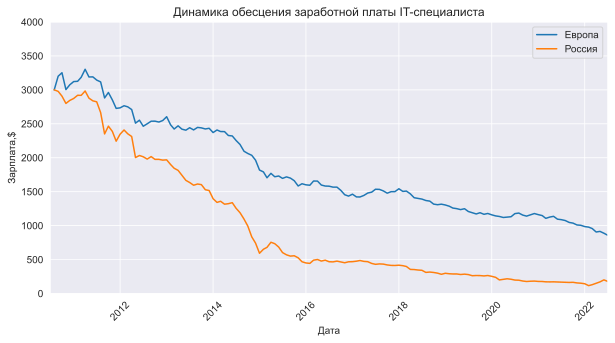

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(x=eur_usd_ratio['dt'],y=eur_usd_ratio['salary_usd_europe'], label='Европа')
sns.lineplot(x=usd_rub_ratio['dt'],y=usd_rub_ratio['salary_usd_russia'], label='Россия')
plt.title('Динамика обесцения заработной платы IT-специалиста')
plt.ylabel('Зарплата,$')
plt.xlabel('Дата')
plt.xticks(fontsize=10,rotation=45)
plt.axis([datetime(2010,7,1),datetime(2022,7,1),0,4000])
plt.show()

В целом, опять же, предсказуемый результат, предполагая, что реальная инфляция в России выше, чем в Европе более чем в 2 раза.
С учетом инфляции можно сказать, что заработная плата сотрудника из Росии обесценивается очень быстрыми темпами и 3000 у.е превратились бы на текущий момент в 178 у.е., в то время как обесцение заработной платы сотрудника из Европы происходит более плавными темпами и на текущий момент 3000 у.е. превартились бы в 858 у.е. \
Если учесть ежегодную индексацию заработной платы, картины выглядела, конечно, не так плачевно. Посчитаем во сколько раз обесценилась заработная плата сотрудников для наглядности.

Обесцение ЗП сотрудника спустя 12 лет в Европе:

In [23]:
'{0:.0%}'.format(
    (wages_usd - eur_usd_ratio[eur_usd_ratio['dt']=='2022-07-01']['salary_usd_europe'][0]) / wages_usd)

'71%'

Обесцение ЗП сотрудника спустя 12 лет в России:

In [24]:
'{0:.0%}'.format((wages_usd - usd_rub_ratio[usd_rub_ratio['dt']=='2022-07-01']['salary_usd_russia'][0]) / wages_usd)

'94%'

Разница сущесвенная, даже на прикидочных данных, без учета расчета реальных потребительских корзин и без учета покупки дорогостоящей техники

## Итоги исследования

Анализируя полученные данные можно сказать следующее:

* Волатильность курса рубля в России очень большая, это негативно влияет на покупательскую способность и благостояние граждан. Курс валюты напрямую влиет на стоимость импортных товаров и продуктов, доля которых в России очень высокая. С течением времени рядовой сотрудник IT-компании может позволить себе покупать на ту же зарплату все меньше и меньше благ, которые мог приобретать ранее в необходимом объеме.
* Свое влияние вносит и инфляция. Гиперинфляция в стране губительно сказывается на экономике, покупательской способности граждан и ведет к быстрому обесценению денежных средств.
* Жизнь в экономически развитой стране в Европе позволяет сохранять достойный уровень жизни при средних темпах роста инфляции и почти нулевой волатильности курса валют. Поэтому для человека проритетнее жить именно в такой стране и получать заработную плату в евро.